Data diambil dari: \
https://www.kaggle.com/datasets/rankirsh/esports-earnings/data

Data berbentuk CSV (Comma Separated Values), dengan 2 buah file CSV. Attribute ada 12 jika ditotal sebelum digabung.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

In [44]:
hdf = pd.read_csv('dataset/HistoricalEsportData.csv')
gdf= pd.read_csv('dataset/GeneralEsportData.csv')

In [45]:
print(hdf.head())
print(gdf.head())

         Date                          Game  Earnings  Players  Tournaments
0  1998-01-01  Command & Conquer: Red Alert     15000        8            1
1  1998-01-01                    QuakeWorld     15000        8            1
2  1998-05-01                      Quake II     15000        4            1
3  1998-05-01            Total Annihilation     15000        2            1
4  1998-05-01                    QuakeWorld       300        3            1
                    Game  ReleaseDate     Genre  TotalEarnings  \
0         Age of Empires         1997  Strategy         510716   
1      Age of Empires II         1999  Strategy        3253233   
2     Age of Empires III         2005  Strategy         115844   
3      Age of Empires IV         2021  Strategy         994675   
4  Age of Empires Online         2011  Strategy           9807   

   OfflineEarnings  PercentOffline  TotalPlayers  TotalTournaments  
0           375858               1           473               265  
1        

## Penjelasan Karakteristik Data
### HistoricalEsportData.csv - hdf
Date: Tanggal turnamen berlangsung | Quantitative-Discrete\
Game: Nama game yang dimainkan dalam turnamen tersebut | Categorical-Nominal\
Earnings: Total hadiah dari turnamen tersebut | Quantitative-Continues\
Players: Jumlah pemain yang bermain di turnamen tersebut | Quantitative-Discrete\
Tournament: Jumlah turnamen yang berlangsung pada tanggal tersebut sekaligus | Quantitative-Discrete\

### GeneralEsportData.csv - gdf
Game: Nama game | Categorical-Nominal\
ReleaseDate: Tahun game tersebut dirilis | Quantitative-Discrete\
Genre: Genre game | Categorical-Nominal\
TotalEarnings: Total hadiah dari semua turnamen game tersebut | Quantitative-Continues\
OfflineEarnings: Total hadiah dari semua turnamen offline game tersebut | Quantitative-Continues\
PercentOffline: Berapa persen turnamen game tersebut berlangsung secara offline | Quantitative-Continues\
TotalPlayers: Jumlah pemain yang pernah bertanding di turnamen game tersebut | Quantiative-Discrete\
TotalTournaments: Jumlah turnamen yang pernah berlangsung | Quantitative-Discrete

In [46]:
print(gdf.info())
print(hdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7   TotalTournaments  650 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9244 non-null   object 
 1   Game         9244 non-null   object 
 2   Earnings     9244 non-null   float64
 3   Players      9244 non-null   int64  


In [55]:
hdf_g = pd.merge(hdf, gdf[['Game', 'Genre']], on='Game', how='left')
# Memberikan kolom Genre pada dataframe Historical, sehingga lebih mudah untuk dianalisis

            Date                                  Game  Earnings  Players  \
0     1998-01-01          Command & Conquer: Red Alert     15000        8   
1     1998-01-01                            QuakeWorld     15000        8   
2     1998-05-01                              Quake II     15000        4   
3     1998-05-01                    Total Annihilation     15000        2   
4     1998-05-01                            QuakeWorld       300        3   
...          ...                                   ...       ...      ...   
9239  2023-10-01                                  osu!      1228        6   
9240  2023-10-01                     Trackmania (2020)       874       11   
9241  2023-10-01                        Age of Empires       615        8   
9242  2023-10-01                     Age of Empires II       490       12   
9243  2023-10-01  PLAYERUNKNOWN'S BATTLEGROUNDS Mobile         0        0   

      Tournaments                 Genre  
0               1              St

In [26]:
hdf_g.head()

,Date,Game,Earnings,Players,Tournaments,Genre
0,1998-01-01,Command & Conquer: Red Alert,15000,8,1,Strategy
1,1998-01-01,QuakeWorld,15000,8,1,First-Person Shooter
2,1998-05-01,Quake II,15000,4,1,First-Person Shooter
3,1998-05-01,Total Annihilation,15000,2,1,Strategy
4,1998-05-01,QuakeWorld,300,3,1,First-Person Shooter


In [78]:
hdf_g['Date'] = pd.to_datetime(hdf_g['Date'])

# Extract the year from the 'Date' column
hdf_g['Year'] = hdf_g['Date'].dt.year

hdfbersih = hdf_g[hdf_g[["Earnings","Players"]].notnull().all(1)]
hdfbersih[["Earnings","Players"]] = hdfbersih[["Earnings","Players"]].abs()

gdfbersih = gdf[gdf[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]].notnull().all(1)]
gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]] = gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]].abs()

C:\Users\alvin\AppData\Local\Temp\ipykernel_23180\4081729484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]] = gdfbersih[["TotalEarnings", "OfflineEarnings", "PercentOffline", "TotalPlayers", "TotalTournaments"]].abs()


<Axes: title={'center': 'Grafik banyaknya game berdasarkan genre'}, xlabel='Genre', ylabel='Jumlah Game'>

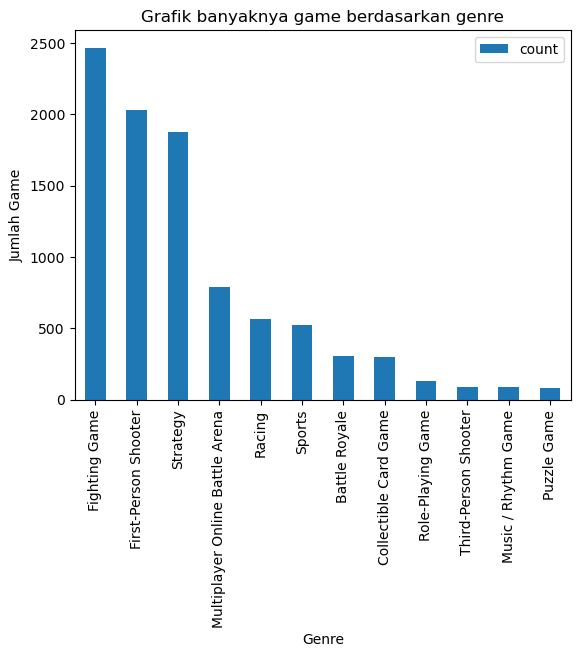

In [27]:
df1 = hdfbersih.groupby(['Genre', 'Game'])['Game'].value_counts()
df01= hdfbersih["Game"].value_counts()
genre_counts = hdfbersih['Genre'].value_counts().reset_index()
genre_counts.plot(kind="bar", x="Genre", title="Grafik banyaknya game berdasarkan genre", xlabel="Genre", ylabel="Jumlah Game")

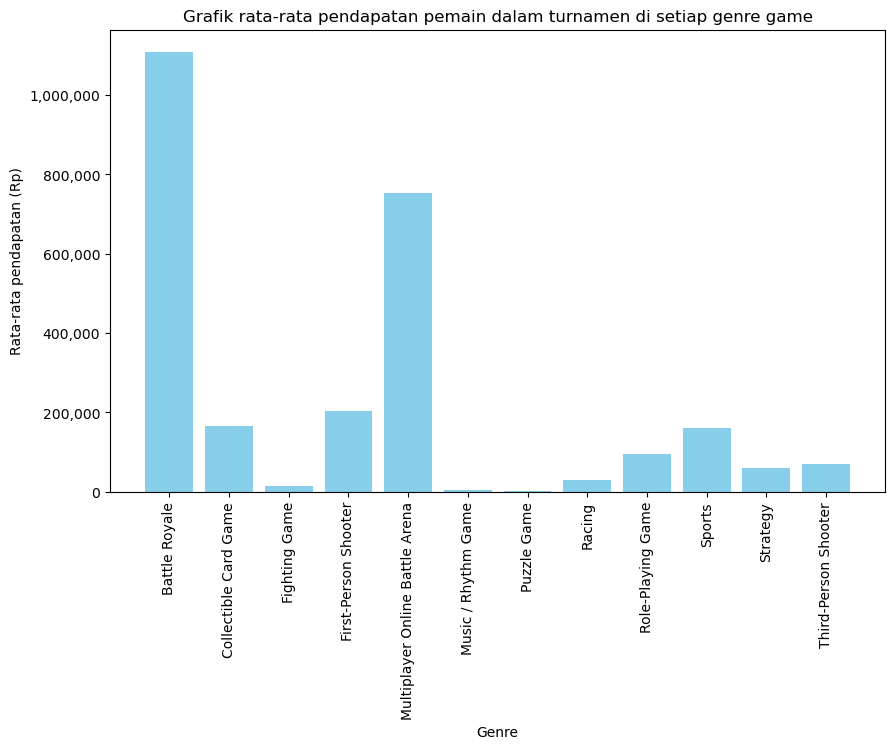

In [28]:
df02 = hdfbersih.groupby("Genre")["Earnings"].mean()
pd.set_option('display.float_format', '{:.0f}'.format)

def format_ticks(value, _):
    return '{:,.0f}'.format(value)

plt.figure(figsize=(10, 6))
plt.bar(df02.index, df02, color='skyblue')
plt.title('Grafik rata-rata pendapatan pemain dalam turnamen di setiap genre game')
plt.xlabel('Genre')
plt.ylabel('Rata-rata pendapatan (Rp)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [58]:
hdf_g['Date'] = pd.to_datetime(hdf_g['Date'])

# Extract the year from the 'Date' column
hdf_g['Year'] = hdf_g['Date'].dt.year

df2 = hdf_g.groupby(["Year"])["Tournaments"].size()

grouped_data = hdf_g.groupby('Year')['Tournaments'].sum().reset_index()
print(hdf_g)



           Date                                  Game  Earnings  Players  \
0    1998-01-01          Command & Conquer: Red Alert     15000        8   
1    1998-01-01                            QuakeWorld     15000        8   
2    1998-05-01                              Quake II     15000        4   
3    1998-05-01                    Total Annihilation     15000        2   
4    1998-05-01                            QuakeWorld       300        3   
...         ...                                   ...       ...      ...   
9239 2023-10-01                                  osu!      1228        6   
9240 2023-10-01                     Trackmania (2020)       874       11   
9241 2023-10-01                        Age of Empires       615        8   
9242 2023-10-01                     Age of Empires II       490       12   
9243 2023-10-01  PLAYERUNKNOWN'S BATTLEGROUNDS Mobile         0        0   

      Tournaments                 Genre  Year  
0               1              Strategy

<Axes: title={'center': 'Grafik banyaknya tournamen dari tahun ke tahun'}, xlabel='Tahun', ylabel='Banyaknya Tournamen'>

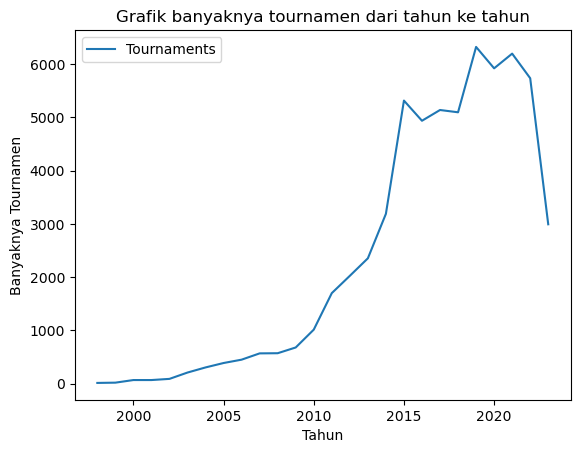

In [30]:
grouped_data.plot(kind="line", x="Year", y="Tournaments", xlabel="Tahun", ylabel="Banyaknya Tournamen" ,title="Grafik banyaknya tournamen dari tahun ke tahun")

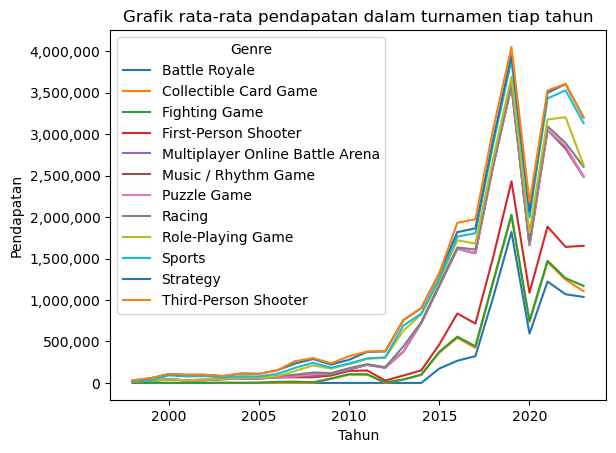

In [65]:
df3 = hdfbersih.groupby(["Year", "Genre"])["Earnings"].mean().unstack()
pd.set_option('display.float_format', '{:.0f}'.format)

ax = df3.plot(kind="line", stacked=True, title="Grafik rata-rata pendapatan dalam turnamen tiap tahun", xlabel="Tahun", ylabel="Pendapatan dalam turnamen (Rp)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')

# Menampilkan plot
plt.show()

#plt.figure(figsize=(10, 6))
#plt.bar(df02.index, df02, color='skyblue')
#plt.title('Average Earnings by Genre')
#plt.xlabel('Genre')
#plt.ylabel('Average Earnings')
#plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.show()


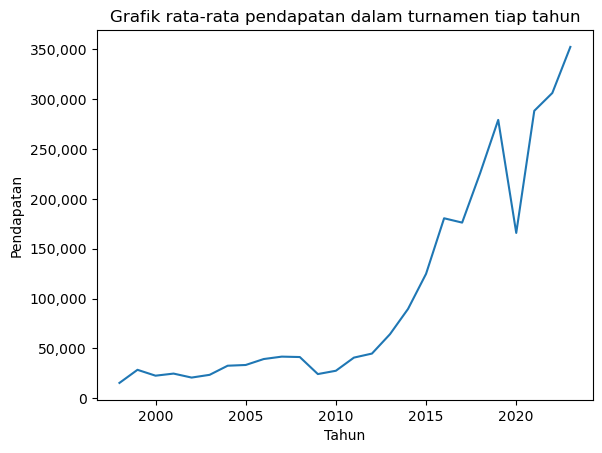

In [66]:
df3 = hdfbersih.groupby("Year")["Earnings"].mean()
pd.set_option('display.float_format', '{:.0f}'.format)

ax = df3.plot(kind="line", stacked=True, title="Grafik rata-rata pendapatan dalam turnamen tiap tahun", xlabel="Tahun", ylabel="Pendapatan dalam turnamen (Rp)")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Tahun')
plt.ylabel('Pendapatan')

# Menampilkan plot
plt.show()

<Axes: xlabel='Genre'>

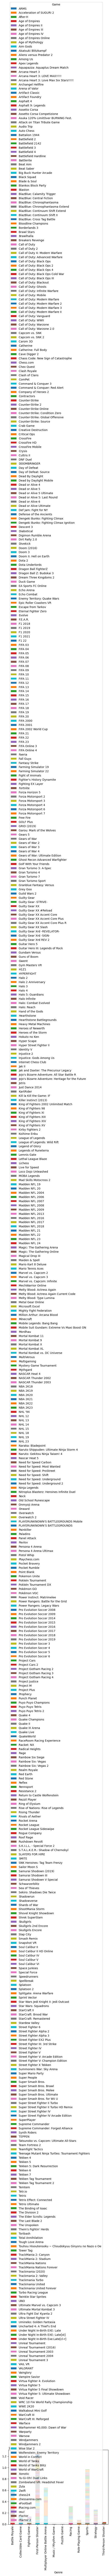

In [67]:
df03 = hdfbersih.groupby(["Genre","Game"])["Earnings"].mean().unstack()
df03.plot(kind="bar",stacked=True, title="Grafik rata-rata pendapatan dalam turnamen tiap game berdasarkan genre", xlabel="Genre", ylabel="Rata-rata pendapatan dalam turnamen (Rp)")


<Axes: xlabel='Genre'>

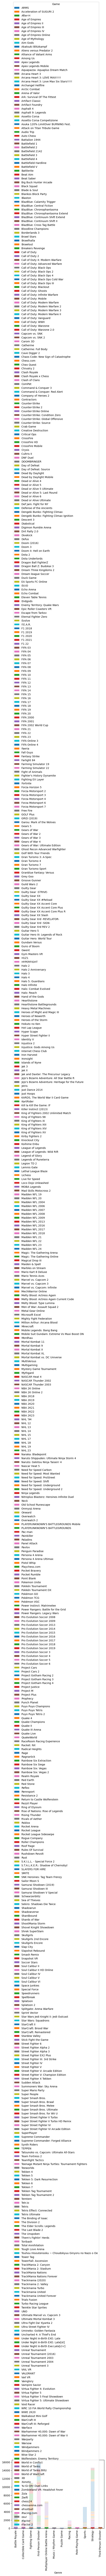

In [73]:
df04 = gdf.groupby(["Genre", "Game"])["TotalTournaments"].sum().unstack()
df04.plot(kind="bar", stacked=True, title="Grafik banyaknya tournaments tiap game berdasarkan genre", xlabel="Genre", ylabel="Banyaknya turnamen")

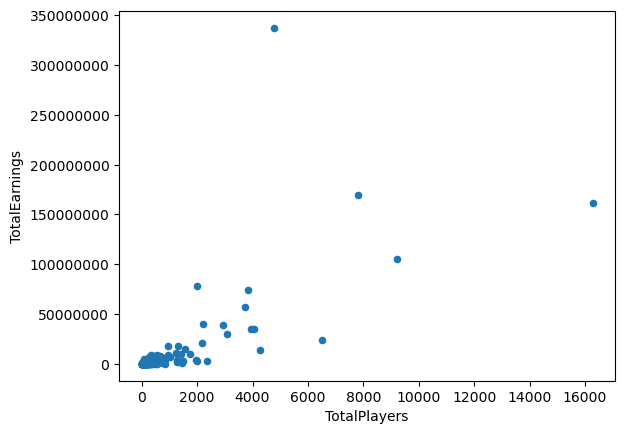

In [79]:
gdfbersih.plot(kind="scatter", x="TotalPlayers", y="TotalEarnings")

# Define a function to format ticks as full numbers
def format_ticks(x, _):
    return f"{x:.0f}"

# Apply the formatter to the y-axis
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.show()